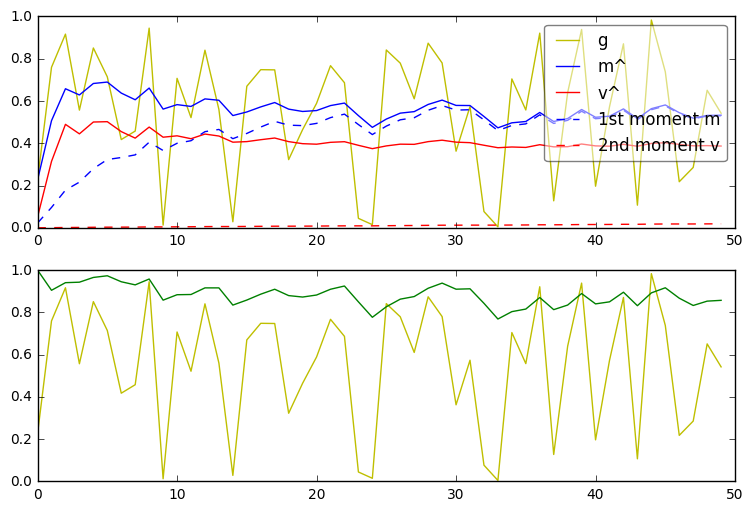

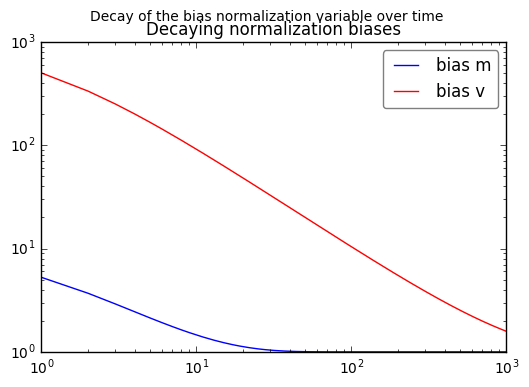

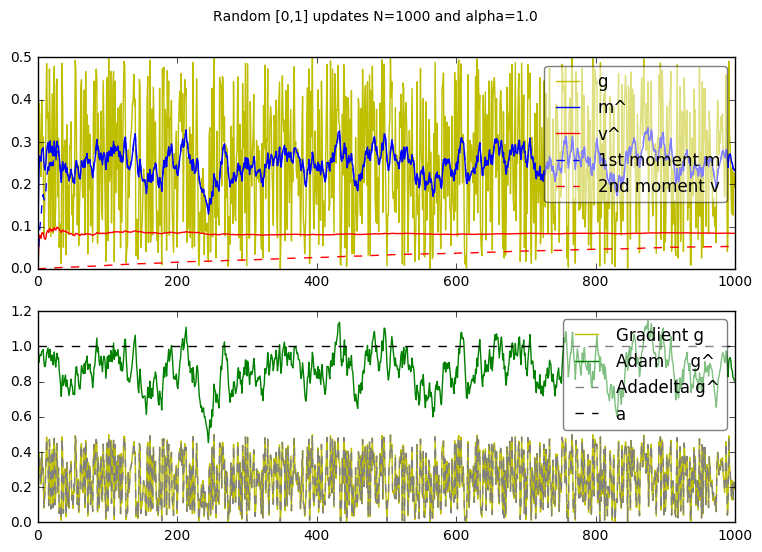

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math


def _rms(val, epsilon):
#     print(val+epsilon)
    return math.sqrt(val+epsilon)


def adadelta_sequence(sequence, lr=1, rho=0.95, epsilon=1):
    res = []
    e_g2 = 0
    e_d2 = 0
    for t, gradient_t in enumerate(sequence):
        e_g2 = rho*e_g2 + (1-rho)*gradient_t
        dx = _rms(e_d2, epsilon)/_rms(e_g2, epsilon)*gradient_t
        e_d2 = rho*e_d2 + (1-rho)*gradient_t
        res.append(dx)
    return res


def adam_sequence(a, b1=.9, b2=0.999, e=10e-8, n=1.0):
  res = []
  m, v = 0, 0
  for t, x in enumerate(a):
    m = b1*m + (1-b1)*x
    v = b2*v + (1-b2)*x*x
    bias_m = 1 / (1 - b1**(t+1))
    bias_v = 1 / (1 - b2**(t+1))
    m_ = m * bias_m
    v_ = v * bias_v
    a_ = m_/(np.sqrt(v_)+ e)*n
    res.append([a_, m_, v_, m, v, bias_m, bias_v])
  return np.asarray(res).T


def enlarge_figure():
    n = 1.5
    fig = plt.figure() 
    default_size = fig.get_size_inches() 
    fig.set_size_inches((default_size[0]*n, default_size[1]*n))
    return fig


def plot_adam_data(original, data, ada_data=None, title=None):
    fig = enlarge_figure()
    
    if title is not None:
        fig.suptitle(title)

    subplot = plt.subplot(211)
    x = np.arange(n)
    subplot.plot(x, seq, label='g', color='y')
    subplot.plot(x, data[1], label='m^', color='b')
    subplot.plot(x, data[2], label='v^', color='r')
    subplot.plot(x, data[3], '--', label='1st moment m', color='b')
    subplot.plot(x, data[4], '--', label='2nd moment v', color='r')
    subplot.legend(fancybox=True,  framealpha=0.5)

    subplot = plt.subplot(212)
    x = np.arange(n)
    subplot.plot(x, seq,     label='Gradient g', color='y')
    subplot.plot(x, data[0], label='Adam     g^', color='g')
    if ada_data is not None:
        subplot.plot(x, ada_data, '--', label='Adadelta g^', color='grey')
    subplot.plot(x, np.ones(seq.shape), '--', color='black', label='a')
    subplot.legend(fancybox=True,  framealpha=0.5)
    
    
    plt.show()
    

def plot_bias_normalizatoin_factors(data):
   
    fig = plt.figure()
    fig.suptitle('Decay of the bias normalization variable over time')

    subplot = plt.subplot(111)
    x = np.arange(n)
    subplot.loglog(x, data[5], label='bias m', color='b')
    subplot.loglog(x, data[6], label='bias v', color='r')
    subplot.legend(fancybox=True,  framealpha=0.5)
    subplot.set_title('Decaying normalization biases')
    
    plt.show()
    


n = 1000
seq = np.random.rand(n)*0.5
adam_data = adam_sequence(seq)
ada_data = adadelta_sequence(seq)
plot_bias_normalizatoin_factors(adam_data)
plot_adam_data(seq, adam_data, ada_data, 'Random [0,1] updates N=1000 and alpha=1.0')



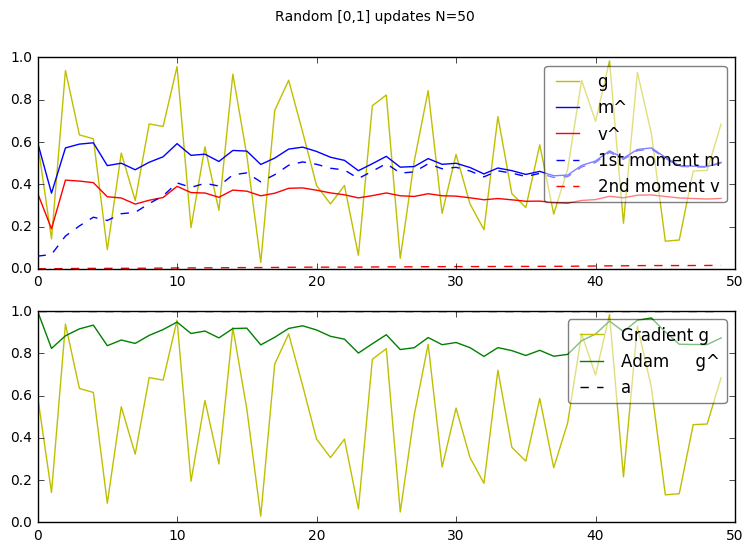

In [30]:
n = 50
seq = np.random.rand(n)
adam_data = adam_sequence(seq)
plot_adam_data(seq, adam_data, title='Random [0,1] updates N=%d' %n)

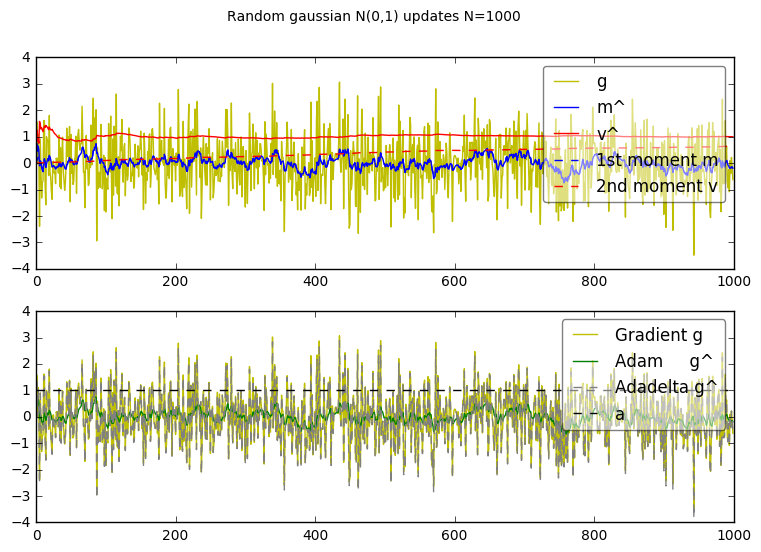

In [31]:
n = 1000
seq = np.random.randn(n)
adam_data = adam_sequence(seq)
ada_data = adadelta_sequence(seq)
plot_adam_data(seq, adam_data, ada_data, title='Random gaussian N(0,1) updates N=%d' % n)

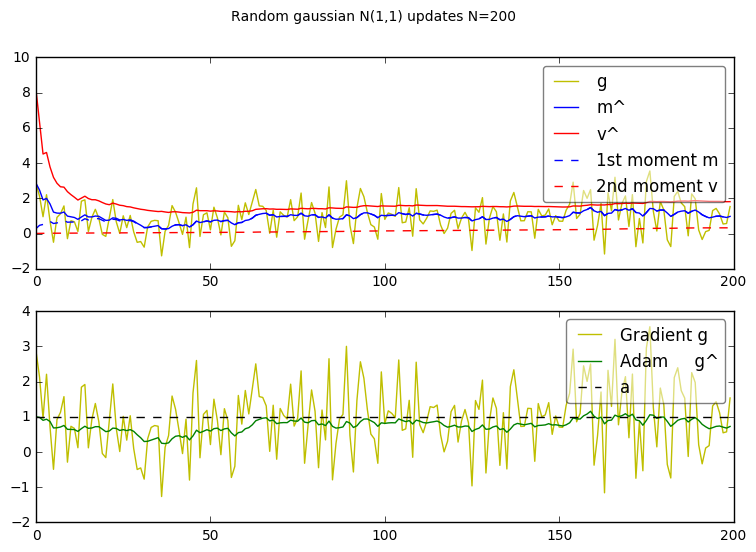

In [32]:
n = 200
seq = np.random.randn(n) + 1
adam_data = adam_sequence(seq)
plot_adam_data(seq, adam_data, title='Random gaussian N(1,1) updates N=%d' % n)

In [21]:
print("""Results of the study:
          - Bias normalization improves stability of first updates
          - second moment punishes updates of variables that change sign often
              - noisy updates decrease to values proportional to (1-B1)*a (i.e. 0.1*a)
          - stable updates fluctuate around (B1 +/ - (1-B1))*a i.e. 0.8a--1.0a
      """
     )

Results of the study:
          - Bias normalization improves stability of first updates
          - second moment punishes updates of variables that change sign often
              - noisy updates decrease to values proportional to (1-B1)*a (i.e. 0.1*a)
          - stable updates fluctuate around (B1 +/ - (1-B1))*a i.e. 0.8a--1.0a
      


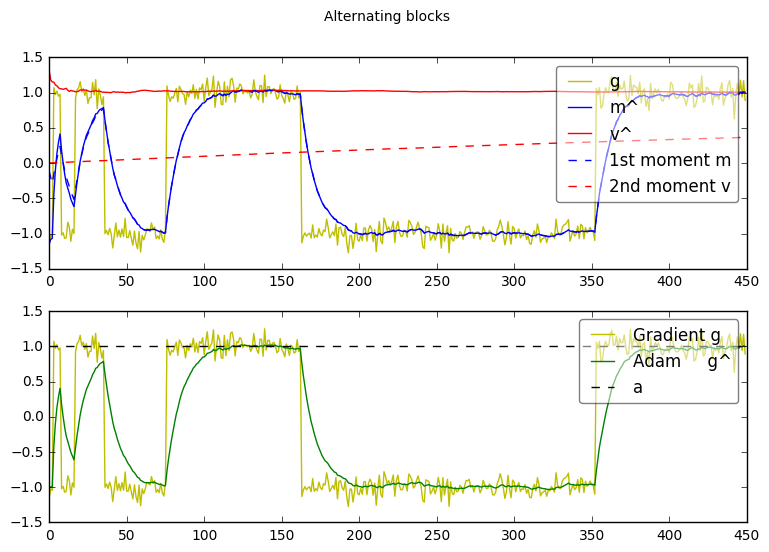

In [10]:
def get_variational_sequence(n):
    seq = np.random.randn(n) + 2
    seq = np.ones(n) + np.random.randn(n)*0.1
    block_size, start, i = 1, 0, 0
    while True:
    #     block_size = int(block_size*1.5)
        block_size += max(block_size+1, int(block_size*1.2))
        stop = min(len(seq), i+block_size)
        i += 1

        seq[start:stop] *= 1 if i%2 == 0 else -1

        start = stop
        if stop == len(seq):
            break
    return seq
   
n= 450
seq = get_variational_sequence(n)
adam_data = adam_sequence(seq)
plot_adam_data(seq, adam_data, 'Alternating blocks')

In [11]:
print("""Results of the study:
          - B2 defines the tolerance to sign changes
          - Tolerance decreases with time t i.e. sign change during the start of the learning is Ok, 
              while on the late stage is more suspicious
      """
     )

Results of the study:
          - B2 defines the tolerance to sign changes
          - Tolerance decreases with time t i.e. sign change during the start of the learning is Ok, 
              while on the late stage is more suspicious
      


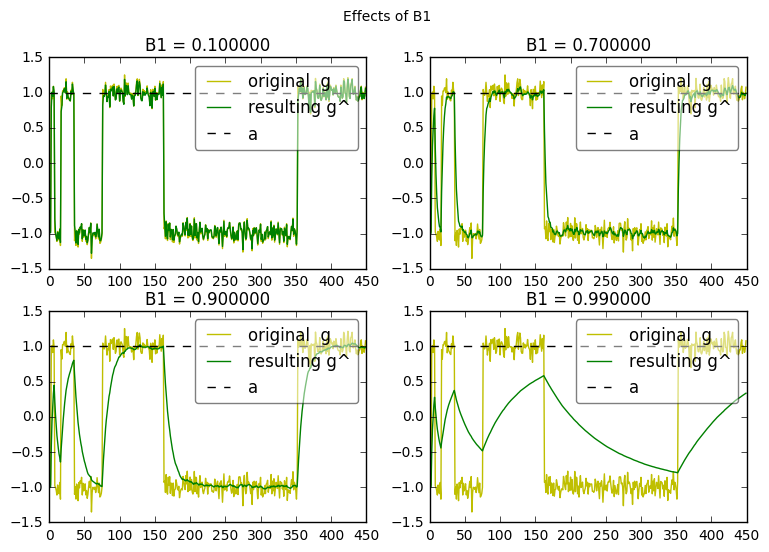

In [11]:
def plot_gradient(original, adamed, subplot='111'):
    subplot = plt.subplot(subplot)
    x = np.arange(n)
    subplot.plot(x, original,     label='original  g ', color='y')
    subplot.plot(x, adamed, label='resulting g^', color='g')
    subplot.plot(x, np.ones(seq.shape), '--', color='black', label='a')
    subplot.legend(fancybox=True,  framealpha=0.5)
    return subplot
    
fig = enlarge_figure()
fig.suptitle('Effects of B1')
b1_set = [0.1, 0.7, 0.9, 0.99]
seq = get_variational_sequence(n)
for i in range(4):
    subplot = '22%d' % (i+1)
    data = adam_sequence(seq, b1=b1_set[i])
    subplot = plot_gradient(seq, data[0], subplot)
    subplot.set_title('B1 = %f' % b1_set[i])
plt.show()
    

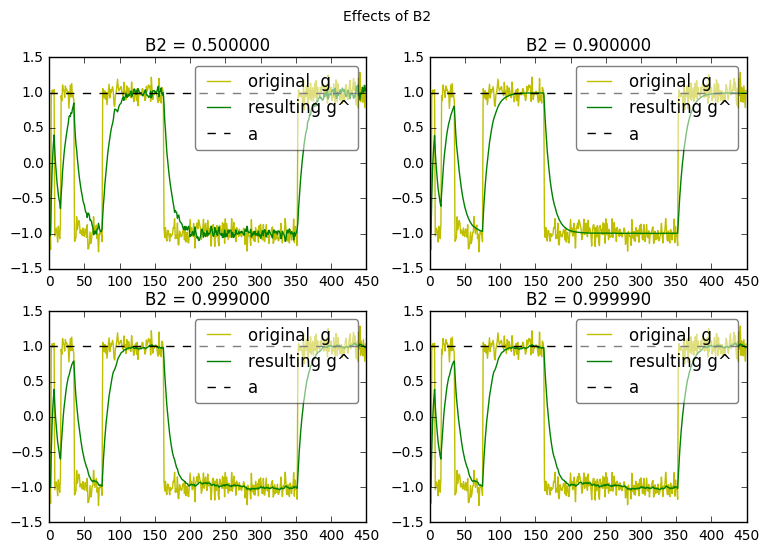

In [13]:
fig = enlarge_figure()
fig.suptitle('Effects of B2')
b2_set = [0.5, 0.9, 0.999, 0.99999]
seq = get_variational_sequence(n)
for i in range(4):
    subplot = '22%d' % (i+1)
    data = adam_sequence(seq, b2=b2_set[i])
    subplot = plot_gradient(seq, data[0], subplot)
    subplot.set_title('B2 = %f' % b2_set[i])
plt.show()

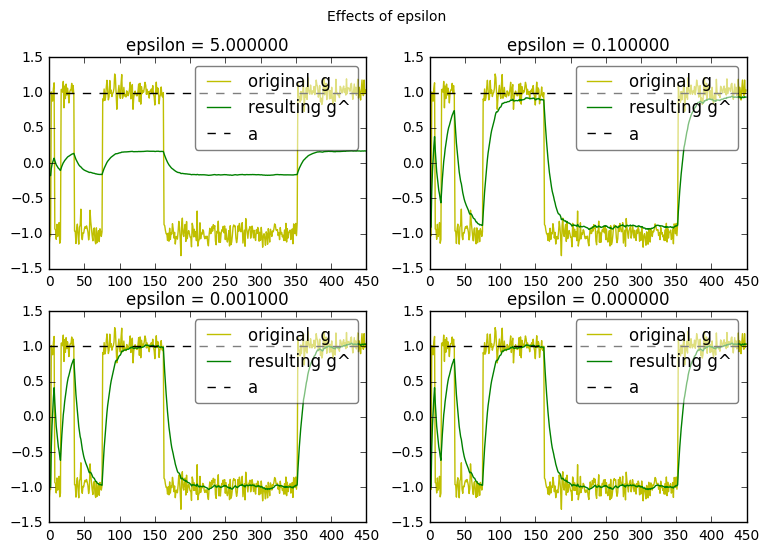

In [14]:
fig = enlarge_figure()
fig.suptitle('Effects of epsilon')
e_set = [5, 0.1, 0.001, 0.0000000000001]
seq = get_variational_sequence(n)
for i in range(4):
    subplot = '22%d' % (i+1)
    data = adam_sequence(seq, e=e_set[i])
    subplot = plot_gradient(seq, data[0], subplot)
    subplot.set_title('epsilon = %f' % e_set[i])
plt.show()

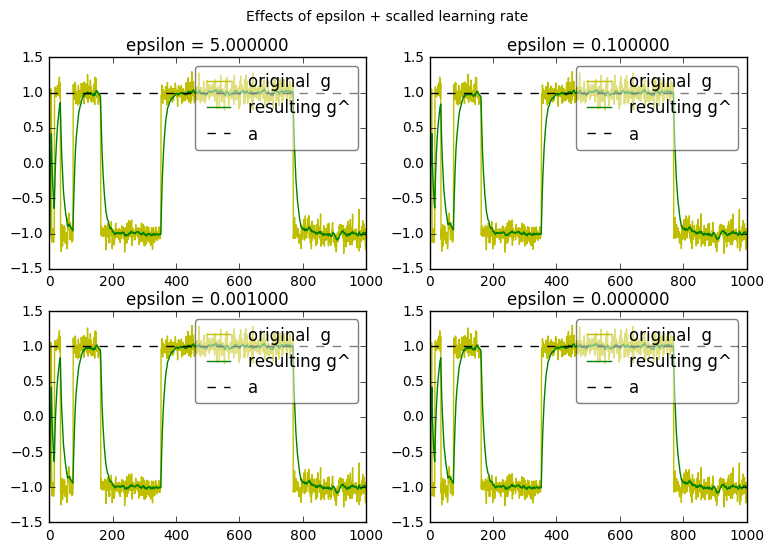

In [19]:
fig = enlarge_figure()
fig.suptitle('Effects of epsilon + scalled learning rate')
e_set = [5, 0.1, 0.001, 0.0000000000001]
seq = get_variational_sequence(n)
for i in range(4):
    subplot = '22%d' % (i+1)
    data = adam_sequence(seq, e=e_set[i], n = 1 + e_set[i])
    subplot = plot_gradient(seq, data[0], subplot)
    subplot.set_title('epsilon = %f' % e_set[i])
plt.show()

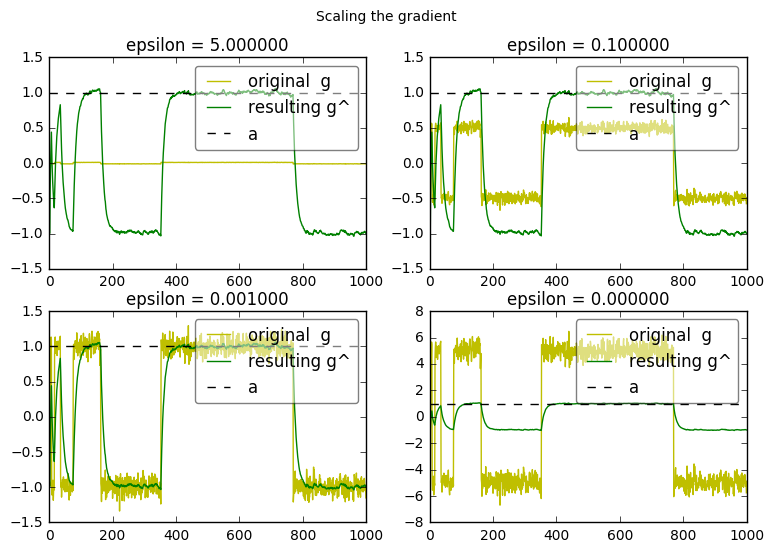

In [16]:
fig = enlarge_figure()
fig.suptitle('Scaling the gradient')
g_set = [0.01, 0.5, 1, 5]
seq = get_variational_sequence(n)
for i in range(4):
    subplot = '22%d' % (i+1)
    data = adam_sequence(seq*g_set[i])
    subplot = plot_gradient(seq*g_set[i], data[0], subplot)
    subplot.set_title('gradient = %f' % e_set[i])
plt.show()

In [20]:
print("""Results of the study:
          - large epsilon is equivalent to slover learning rate n = 1/(1+e)
          - B1 = specifies size of the window / tolerance to changes in gradient value
          - B2 = second order smothness. Noise/wigle smothness
          - Adam normalizes the gradient over time to match learning rate 
              => possible improvement for vanishing gradient
          
      """
     )

Results of the study:
          - large epsilon is equivalent to slover learning rate n = 1/(1+e)
          - B1 = specifies size of the window / tolerance to changes in gradient value
          - B2 = second order smothness. Noise/wigle smothness
          - Adam normalizes the gradient over time to match learning rate 
              => possible improvement for vanishing gradient
          
      
